In [29]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matheus\Documents\GitHub\CD\projeto_3


In [30]:
dados = pd.read_excel('ESPECVIDA.xlsx',index_col=0)
dados1 = pd.read_excel('PIBPER.xlsx',index_col=0)
dados2 = pd.read_excel('SANIT.xlsx',index_col=0)
                     

In [31]:
d = pd.DataFrame()
d1 = pd.DataFrame()
d2 = pd.DataFrame()

In [32]:
d = dados.Dez
d1 = dados1.Dez
d2 = dados2.Dez

In [33]:
d.head()

Life expectancy
Abkhazia                  NaN
Afghanistan              53.6
Akrotiri and Dhekelia     NaN
Albania                  77.2
Algeria                  76.0
Name: Dez, dtype: float64

In [34]:
D = pd.DataFrame()

In [35]:
D['expectativa'] = d
D['renda'] = d1
D['saneamento'] = d2

In [36]:
D=D[~np.isnan(D.renda)]
D = D[~np.isnan(D.expectativa)]
D = D[~np.isnan(D.saneamento)]

In [40]:
D.head()

,expectativa,renda,saneamento
Life expectancy,,,
Albania,77.2,1915.424459,94.0
Algeria,76.0,2231.980246,95.0
Angola,57.6,623.245275,58.0
Armenia,73.0,1326.710864,90.0
Australia,82.0,25190.839860,100.0


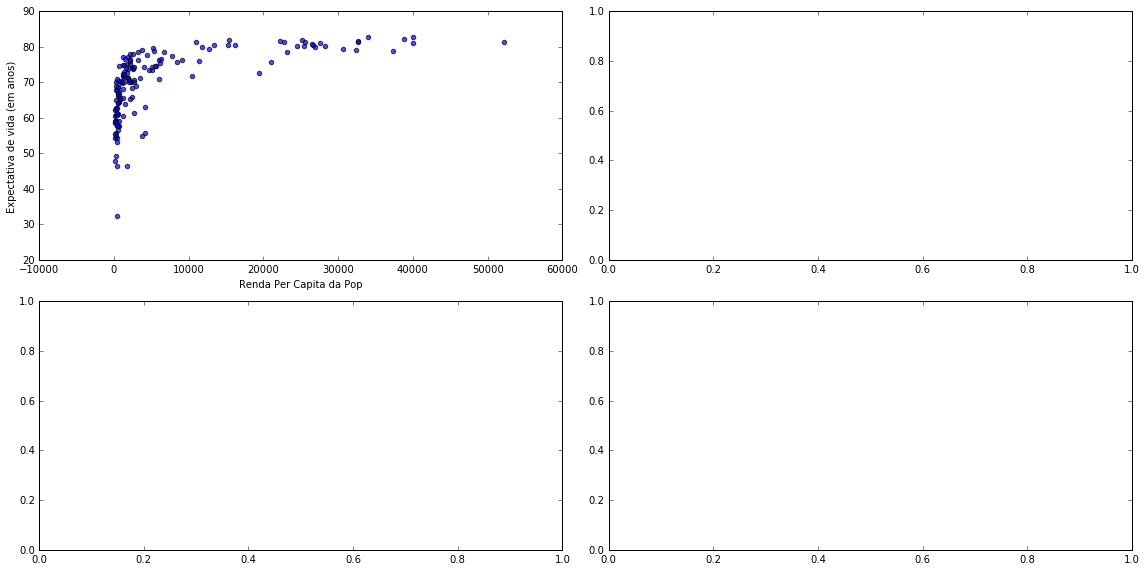

In [42]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(D.renda, D.expectativa, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("Renda Per Capita da Pop")
ax[0,0].set_ylabel("Expectativa de vida (em anos)")

ax[0,1].scatter(dados.GastoSaudePerCap, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Gasto com saúde per capita (em US$)")
ax[0,1].set_ylabel("Expectativa de vida (em anos)")
ax[0,1].set_xlim(0,10000)

ax[1,0].scatter(dados.PercSaudeGov, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("% gasto pelo governo com saúde")
ax[1,0].set_ylabel("Expectativa de vida (em anos)")
ax[1,0].set_xlim(0,35)

ax[1,1].scatter(dados.PropPopSanea, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("% da população geral com saneamento básico")
ax[1,1].set_ylabel("Expectativa de vida (em anos)")
ax[1,1].set_xlim(0,100)

plt.tight_layout(1)

In [ ]:
ax[0,1].scatter(dados.GastoSaudePerCap, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Gasto com saúde per capita (em US$)")
ax[0,1].set_ylabel("Expectativa de vida (em anos)")
ax[0,1].set_xlim(0,10000)

ax[1,0].scatter(dados.PercSaudeGov, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("% gasto pelo governo com saúde")
ax[1,0].set_ylabel("Expectativa de vida (em anos)")
ax[1,0].set_xlim(0,35)

ax[1,1].scatter(dados.PropPopSanea, dados.ExpVida, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("% da população geral com saneamento básico")
ax[1,1].set_ylabel("Expectativa de vida (em anos)")
ax[1,1].set_xlim(0,100)

plt.tight_layout(1)